# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [2]:
#Добавляем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Сохраним таблицу в переменную
data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')

In [4]:
# Псомотрим данные
pd.set_option('display.max_columns', None)
data_v1 =data['last_price'].count()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# выведем общую информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# посмотрим минимальные, максимальные значения таблицы
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице присутствуют аномальные значения. Например минимальное каличество комнат неможет быть равно 0(Может сдесь предполагались студии?), а максимальное равно 19. Или общая площадь 900 метров квадратных - это очень много.

In [7]:
#привидем столбцы к стандарту
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

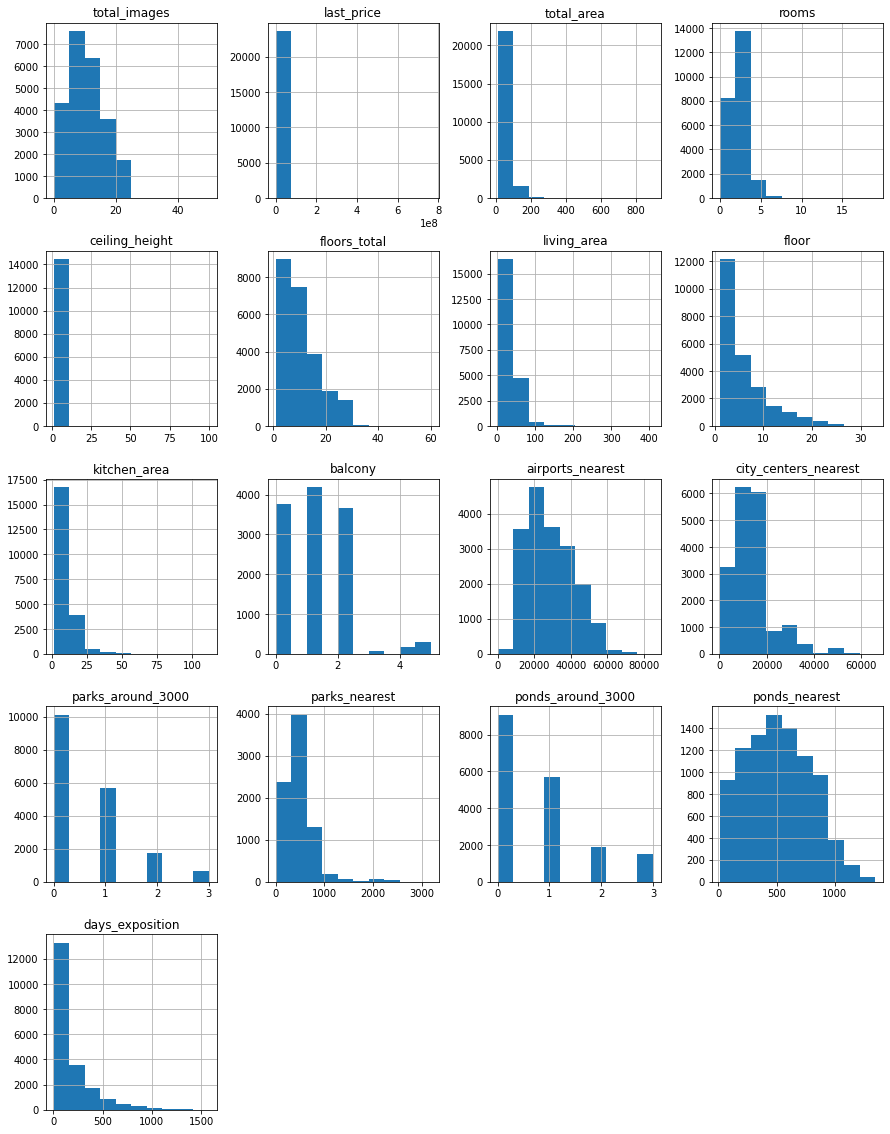

In [8]:
# постороим гистограммы
data.hist(figsize=(15, 20));

**Вывод:**
В данных много аномальных значений. Так же некоторые столбцы имеют не тот тип данных.
Все это надо будет обработать, но начнем мы с пропусков.

## Предобработка данных

###  Выявление пропусков и дубликатов

In [9]:
# посмотрим сколько же всего пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
#процент пропусков от всего датасета
data.isna().mean().sort_values(ascending=False)*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around_3000       23.283683
parks_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

In [11]:
# посчитаем количество явных дупликатов
data.duplicated().sum()

0

#### Обработка неявных дубликатов

In [12]:

print(data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

И так в названиях насленных пунков пристсвуют не явные дубликаты(посёлок городского типа Мга и городской посёлок Мга). Надо их обработать.

In [13]:
#
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа','городской поселок'], 'поселок', regex=True)
)


In [14]:
data['locality_name'].nunique()

322

Количество уникальных значений в стобце locality_name уменьшилось с 364 до 322.

### Обработаем пропуски

Теперь разберемся с Пропусками.
Их в датафрейме довольно много. В некоторых столбцах количество пропусков более 50%. Посмотрим, что можно с ними сделать:
 1. Самое большое количество пропусков в столбце с апартаментами. Причиной скорее всего является не знанием хозяев является ли их собственность апартаментами. Так как тип данных этого столбца bool, заменим все пропуски на False.
 2. Столбцы с наличием водоемов и парков и расстоянием до них, не самые главные критерии для квартиры.
    Предлагаю пропуски в этих столбцах не трогать.
 3. Балконы - скорее всего пропуски в столбце обозначают отсутствие балкона в квартире. Заменим пропуски нулем.
 4. Высота потолков - пропуски мы заменим медианным значением в зависимости от населеннго пункта.
 5. в столбце удаленности от центра заменим медианным значением относительно населенных пунктов.


In [15]:
# заменяем пропуски в столбце балконы
data['balcony']=data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [16]:
# заменяем пропуски в столбце апртаменты
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

Теперь разберемся с высотой потолков

In [17]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

Как видим есть высота выше 20 метров а так же ниже 2, что скорее всего является ошибкой.


In [18]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height']  /= 10

In [19]:
data['ceiling_height'].max()

14.0

In [20]:
data['ceiling_height'].isna()

0        False
1         True
2         True
3         True
4        False
         ...  
23694    False
23695     True
23696     True
23697    False
23698    False
Name: ceiling_height, Length: 23699, dtype: bool

In [21]:
# функция для заполнения пропусков в стобце 2 медианным значением в зависимости от столбца1.
def del_nan(df,column1, column2):
    pt = df.pivot_table(index=column1, values= column2, aggfunc='median')
    df[column2]=df[column2].fillna(-1)
    for  i in range(df[column2].count()):
            try:
                if df[column2].loc[i] == -1.0:
                    index = df.loc[i,column1]
                    df.loc[i,column2]=pt.loc[index,column2]
            except:
                pass
    return column2

In [22]:
# Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
data['ceiling_height'] = data[del_nan(data,'locality_name','ceiling_height')]
data = data.query('ceiling_height >0')
data['ceiling_height'].isna().sum()


0

In [23]:

data['ceiling_height'].value_counts()


2.70     7848
2.50     4169
2.60     2130
2.55     1619
2.75     1120
         ... 
4.90        1
10.00       1
2.89        1
5.20        1
4.65        1
Name: ceiling_height, Length: 186, dtype: int64

In [24]:
data['city_centers_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
8565.0      1
5278.0      1
11575.0     1
3205.0      1
4234.0      1
Name: city_centers_nearest, Length: 7627, dtype: int64

In [25]:
#удалим пропуски в стобце floors_total их всего 85, а оставить их не желательно,
# так как пропуски не дадут изменить тип данных на int.
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isna().sum() 

0

In [26]:
#удалим пропуски в стобце с названиями населенных пунктов

data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'].isna().sum()

0

In [27]:
#посмотрим наличие пропуско
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1843
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2196
balcony                     0
locality_name               0
airports_nearest         5429
city_centers_nearest     5406
parks_around_3000        5405
parks_nearest           15435
ponds_around_3000        5405
ponds_nearest           14431
days_exposition          3147
dtype: int64

### изменим тип данных


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23465 entries, 0 to 23464
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23465 non-null  int64  
 1   last_price            23465 non-null  float64
 2   total_area            23465 non-null  float64
 3   first_day_exposition  23465 non-null  object 
 4   rooms                 23465 non-null  int64  
 5   ceiling_height        23465 non-null  float64
 6   floors_total          23465 non-null  float64
 7   living_area           21622 non-null  float64
 8   floor                 23465 non-null  int64  
 9   is_apartment          23465 non-null  bool   
 10  studio                23465 non-null  bool   
 11  open_plan             23465 non-null  bool   
 12  kitchen_area          21269 non-null  float64
 13  balcony               23465 non-null  float64
 14  locality_name         23465 non-null  object 
 15  airports_nearest   

Поменяем данные  в first_day_exposition на  тип datatime.

В стобцах:
- balcony
- last_price
- floors_total  
изменим тип на int64. Так как в этих стобцах целочисленные показатели.

In [29]:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.tail() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
23460,9,4600000.0,62.40,2016-08-05,3,2.6,9.0,40.0,8,False,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23461,9,9700000.0,133.81,2017-03-21,3,3.7,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23462,14,3100000.0,59.00,2018-01-15,3,2.5,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23463,13,11475000.0,76.75,2017-03-28,2,3.0,17.0,NaN,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23464,4,1350000.0,32.30,2017-07-21,1,2.5,5.0,12.3,1,False,False,False,9.00,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# меням типы данных в стобцах balcony,last_price, floors_total
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
#data['city_centers_nearest'] =data['city_centers_nearest'].astype(int)

In [31]:
# посмотрим на результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23465 entries, 0 to 23464
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23465 non-null  int64         
 1   last_price            23465 non-null  int64         
 2   total_area            23465 non-null  float64       
 3   first_day_exposition  23465 non-null  datetime64[ns]
 4   rooms                 23465 non-null  int64         
 5   ceiling_height        23465 non-null  float64       
 6   floors_total          23465 non-null  int64         
 7   living_area           21622 non-null  float64       
 8   floor                 23465 non-null  int64         
 9   is_apartment          23465 non-null  bool          
 10  studio                23465 non-null  bool          
 11  open_plan             23465 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

**Вывод:**

Была проделана обработка данных в виде:
 1. Были обработаны неявные дубликаты.
 2. Там, где это возможно были убраны пропуски.
 3. Изменены типы данных.

## Посчитайте и добавьте в таблицу новые столбцы

Создадим новые стобцы:
1. С ценой квадратного мера.
2. День публикации объявления.
3. Месец публикации объявления.
4. Год публикации объявления.
5. Тип этажа квартиры (значения — «первый», «последний», «другой»).
6. Расстояние до центра города в километрах.

In [32]:
#создание стобца с ценой за кв.метр
data['prise_metr'] = data['last_price'] / data['total_area']
#округлим занчения в столбце до 1 знака после запятой
data['prise_metr'] = data['prise_metr'].round(decimals=1)
#проверим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,prise_metr
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [33]:
#создание столбцов со временем публикации

# создаем столбец с номером дня
data['day_week'] = data['first_day_exposition'].dt.dayofweek 
# создаем столбец с номером месеца
data['month'] =  data['first_day_exposition'].dt.month
# создаем столбец с годом
data['year'] = data['first_day_exposition'].dt.year
# проверяем результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,prise_metr,day_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


In [34]:
# создадим функция для категоризации этажей
def floor(row):
    floor =row['floor']
    if floor == 1:
        return 'Первый'
    if floor == row['floors_total']:
        return 'Последний'
    return 'Другой'
# создадим столбец с категориями этажей
data['floor_type'] = data.apply(floor, axis=1)
# посомтрим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,prise_metr,day_week,month,year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой


In [35]:
# создадим столбец с км до центра
data['city_centers_km'] = data['city_centers_nearest'] / 1000
# округлим значения в столбце до целого и изменим тип данных
data['city_centers_km'] = data['city_centers_km'].round(decimals=0)
# посмотрим результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,prise_metr,day_week,month,year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,Другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,Другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,Другой,8.0


## Проведите исследовательский анализ данных

1 Постоим гистограммы по следующим параметрам:
 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - тип этажа квартиры («первый», «последний», «другой»);
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего парка.
 


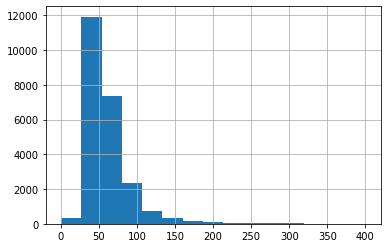

In [36]:
# гистограмма по параметру: общая площадь
data['total_area'].hist(bins=15, range=(0,400));

In [37]:
data['total_area'].describe()

count    23465.000000
mean        60.372358
std         35.715448
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


Максильное значение равно 900.Посмотрим сколько значений больше 400.

In [38]:
data.loc[data['total_area'] >400]['total_area'].count()

23

In [39]:
# удалим их
data[data['total_area'] <=400]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23465 entries, 0 to 23464
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23465 non-null  int64         
 1   last_price            23465 non-null  int64         
 2   total_area            23465 non-null  float64       
 3   first_day_exposition  23465 non-null  datetime64[ns]
 4   rooms                 23465 non-null  int64         
 5   ceiling_height        23465 non-null  float64       
 6   floors_total          23465 non-null  int64         
 7   living_area           21622 non-null  float64       
 8   floor                 23465 non-null  int64         
 9   is_apartment          23465 non-null  bool          
 10  studio                23465 non-null  bool          
 11  open_plan             23465 non-null  bool          
 12  kitchen_area          21269 non-null  float64       
 13  balcony         

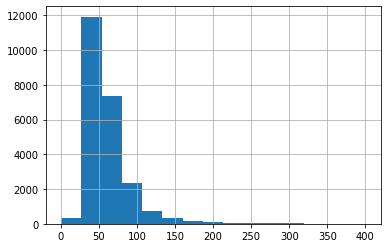

In [40]:
data['total_area'].hist(bins=15, range=(0,400));

In [41]:
data['living_area'] = data[data['living_area'] <200]['living_area']

Можно сдеаль вывод что большинство квартир имеею общую площадь около 40 м.кв.

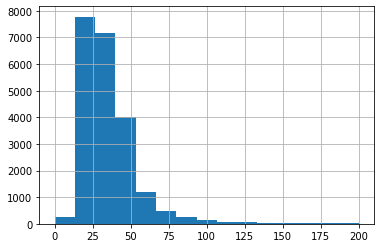

In [42]:
# гистограмма по параметру: жилая площадь
data['living_area'].hist(bins=15, range=(0,200));

Вывод: подавляющее число проданых квартир имют жилую зону до 50 м. кв.
более 50 м.кв. жилой зоны имеют около 1000 квартир.

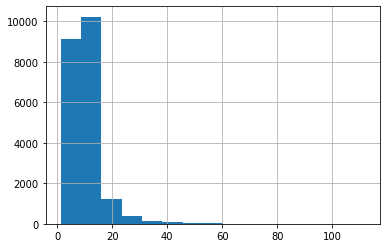

In [43]:
# гистограмма по параметру: площадь кухни
data['kitchen_area'].hist(bins=15);

In [44]:
data.loc[data['kitchen_area'] >50]['kitchen_area'].count()

46

In [45]:
data['kitchen_area'] = data[data['kitchen_area'] <50]['kitchen_area']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23465 entries, 0 to 23464
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23465 non-null  int64         
 1   last_price            23465 non-null  int64         
 2   total_area            23465 non-null  float64       
 3   first_day_exposition  23465 non-null  datetime64[ns]
 4   rooms                 23465 non-null  int64         
 5   ceiling_height        23465 non-null  float64       
 6   floors_total          23465 non-null  int64         
 7   living_area           21589 non-null  float64       
 8   floor                 23465 non-null  int64         
 9   is_apartment          23465 non-null  bool          
 10  studio                23465 non-null  bool          
 11  open_plan             23465 non-null  bool          
 12  kitchen_area          21211 non-null  float64       
 13  balcony         

Наибольшее число квартир имеют площадь около 15м кв

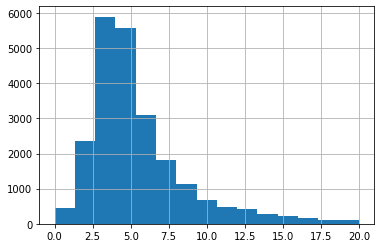

In [47]:
# гистограмма по параметру: цена объекта
data['last_price'].round(decimals=0).astype(int)
data['last_price'].div(1000000).hist(bins=15, range=(0,20));


In [48]:
data.loc[data['last_price'] >40000000]['last_price'].count()

181

In [49]:
data = data.query('last_price <40000000')

У нас есть аномальные значения около нуля. Рассмотрим их.

In [50]:
data['last_price'].sort_values(ascending = False).tail()

21696    470000
5647     450000
16071    450000
17294    430000
8717      12190
Name: last_price, dtype: int64

In [51]:
#  сколько значений ниже 500 тысяч и проверим их на ошибки
data.loc[data['last_price']< 500000]['last_price'].count()

8

In [52]:
data.loc[data['last_price']< 500000]['locality_name']

5647         поселок Будогощь
8717          Санкт-Петербург
10681                  Сланцы
15884                  Сланцы
16071    деревня Вахнова Кара
17294                  Сланцы
21696       поселок Совхозный
23253                  Сланцы
Name: locality_name, dtype: object

Все значения в last_price которые ниже 500 тыс. находятся в деревнях. Значит это не ошибки.

Итак мы нашли  1 аномальное значение. Рассмотрим на скольки строках есть это значение, и  удалим их.

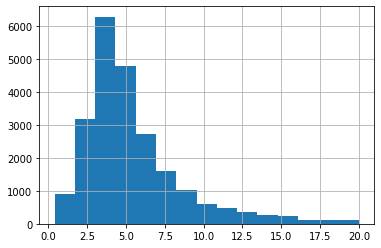

In [53]:
# удалим строку с ошибочным значением
data = data.query('last_price > 13000')
# строим новый график по параметру: цена объекта
data['last_price'].div(1000000).hist(bins=15, range=(0.4,20));

По графику видно что большинство квартир продаются по цене от 3 до 6 млн. рублей

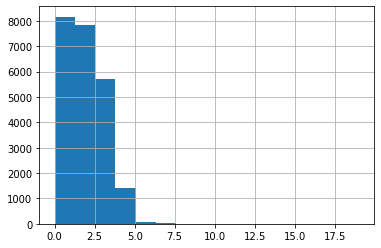

In [54]:
# гистограмма по параметру: количество комнат
data['rooms'].hist(bins=15);

Очень большой показатель у нуля.
Разсмторим эту аномалию

In [55]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8, 14, 10,  9, 19, 16])

Выявили аномалии в виде 0 комнат, а так же много значений выше 8.
Возможно люди указывали ноль комнат при продаже студий.

In [56]:
# посмотрим сколько раз встречаются анамальные значения
data['rooms'].value_counts()

1     7975
2     7834
3     5704
4     1128
5      285
0      191
6       88
7       43
8        9
9        6
10       2
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

Ноль встречается 194 раза, количество комнат выше 14 встречается  по разу. Их следует удалить.


In [57]:
# посмотри сколько раз 0 команат встречается в колонке студий
data.groupby('studio')['rooms'].value_counts()

studio  rooms
False   1        7964
        2        7834
        3        5704
        4        1128
        5         285
        6          88
        0          57
        7          43
        8           9
        9           6
        10          2
        11          2
        14          2
        16          1
        19          1
True    0         134
        1          11
Name: rooms, dtype: int64

In [58]:
data.groupby('open_plan')['rooms'].value_counts()

open_plan  rooms
False      1        7972
           2        7833
           3        5702
           4        1127
           5         285
           0         134
           6          88
           7          43
           8           9
           9           6
           10          2
           11          2
           14          2
           16          1
           19          1
True       0          57
           1           3
           3           2
           2           1
           4           1
Name: rooms, dtype: int64

Из 194 значений, все квартиры где указано 0 комнат являются либо студиями либо квартирами со свободной планировкой. В этом случаи заменим 0 на 1.
Так же удалим строки где комнат более 9.

In [59]:
# заменяем 0 комнат на 1
data.loc[data['rooms']==0, 'rooms'] = 1
data['rooms'].value_counts()

1     8166
2     7834
3     5704
4     1128
5      285
6       88
7       43
8        9
9        6
10       2
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

In [60]:
# удаляем строки  с количеством комнат выше 9
data=data.query('rooms<10')
data['rooms'].value_counts()

1    8166
2    7834
3    5704
4    1128
5     285
6      88
7      43
8       9
9       6
Name: rooms, dtype: int64

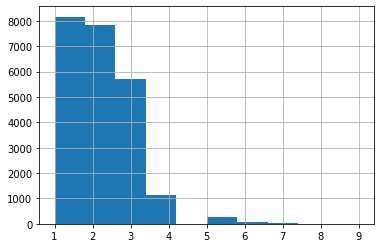

In [61]:
# снова построим гистограмму по количеству комнат
data['rooms'].hist(bins=10);

Можно сделать вывод, что чаще встречаемые квартиры имею до 4 комнат, все что выше похоже на частные случаи.

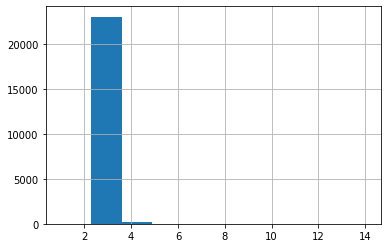

In [62]:
# гистограмма по параметру: высотой потолков
data['ceiling_height'].hist(bins=10);

Основная часть квартир имеют высоту потолков 2 и 3 метра.

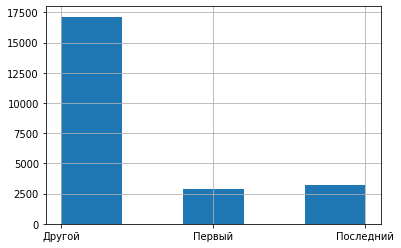

In [63]:
# гистограмма по параметру: тип этажа квартиры
data['floor_type'].hist(bins=5);

Объявлений о продажах квартир с первым и последним этажах имеют 35% от общего числа объявлений.
И да квартир с последним этажом в продаже больше чем с первым.

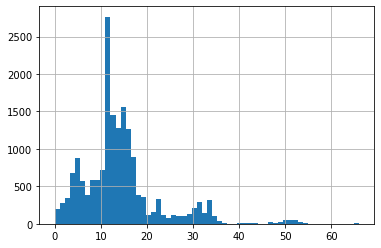

In [64]:
# гистограмма по параметру: расстояние до центра города в метрах
data['city_centers_km'].hist(bins=60);

Мы видим что основная часть объявлений приходится на расстояние до 20км. т.е. находятся в Санкт-Петербурге.

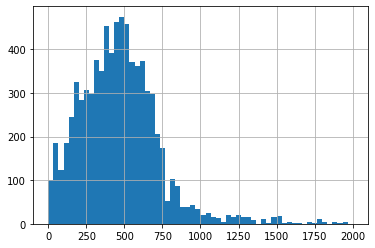

In [65]:
# гистограмма по параметру: расстояние до ближайшего парка в метрах
data['parks_nearest'].hist(bins=60, range=(0,2000));

Судя по графику большинство квартир находятся в пределах 750 метров от парков.У квартир где этот параметр присутствует.


In [66]:
# сколько значений изменилась таблица
data.shape[0]/ data_v1

0.9816025992657919

### Изучим как быстро продавались квартиры

45.0      861
60.0      537
7.0       233
30.0      207
90.0      192
         ... 
1147.0      1
1148.0      1
1345.0      1
994.0       1
1174.0      1
Name: days_exposition, Length: 1136, dtype: int64


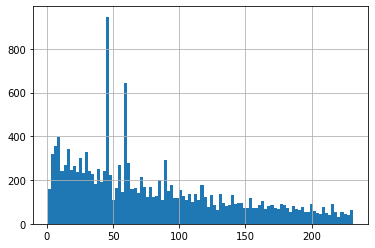

In [67]:
# посмотрим на самые большие значения и построим гиктограмму по продолжительности продажи квартир
print(data['days_exposition'].value_counts())
data['days_exposition'].hist(bins = 100, grid = True, range = (1,231));

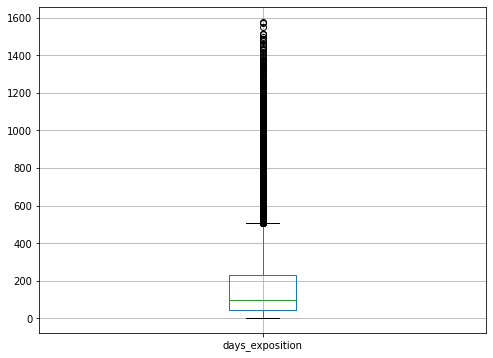

In [68]:
data.boxplot(column='days_exposition', figsize=(8, 6));

In [69]:
data['days_exposition'].describe()

count    20161.000000
mean       179.834730
std        218.862973
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**
Как мы видим на графике, распределение равномерно, с редкими выбросами. Среднее значение 181 день, медиана 95 дней.
Максимальное время продажи составляет 1580 дней, минимальное 1 день.

По выведенным данным мы можем сделать вывод, что быстрые продажи это до 45 дней.  А необычно долгими можно считать объявления провисевшие более 500 дней.


### Исследование факторов влияющих на на стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

#### Создание графиков по факторам влияющим на на стоимость объекта.

In [70]:
# Создадим фукцию для постройки графиков рассеивания
def area(data, column,title):
    sns.scatterplot(data = data, x = column, y = 'last_price', alpha = 0.07)
    plt.title(f'Влияние  {title} на цену объекта')
    plt.xlabel('площадь, м²')
    plt.ylabel('стоимость, 100 млн.руб.')
    plt.ylim(0, 100000000)
    plt.show()
    print('Коэффициент корреляции Пирсона состовляет:', data[column].corr(data['last_price']))
#Применим стиль для графиков
sns.set_style('whitegrid')

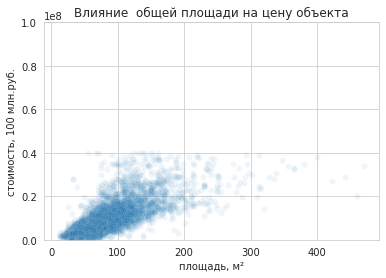

Коэффициент корреляции Пирсона состовляет: 0.7862203526289636


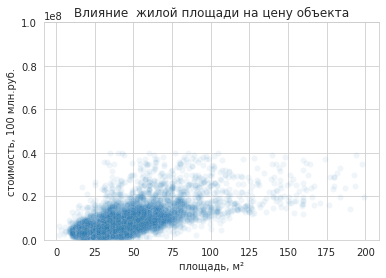

Коэффициент корреляции Пирсона состовляет: 0.6901050413119897


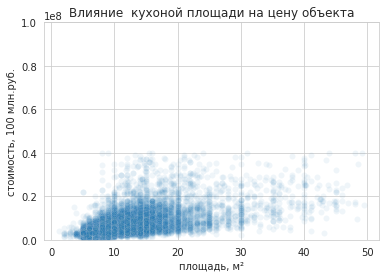

Коэффициент корреляции Пирсона состовляет: 0.6036289002067461


In [71]:
#Создадим графики влияний общей, жиилой, и кухонной площадей на цену объекта
area(data,'total_area', 'общей площади')
area(data,'living_area','жилой площади')
area(data,'kitchen_area','кухоной площади')

**Вывод:**
Графики достаточно похожи. На всех трёх графиках мы видим зависимость цены от площади объекта. На это так же указывает высокий коэффициент Пирсона. Больше площадь - выше цена.


In [72]:
# создадим функцию для графиков  stripplot
def stripplot(data, column, title):
    sns.stripplot(data = data, x = column, y = 'last_price')
    plt.xlabel(f'{title}')
    plt.ylabel('Стоимость, 100 млн.руб.')
    plt.ylim(0, 100000000)
    plt.show()

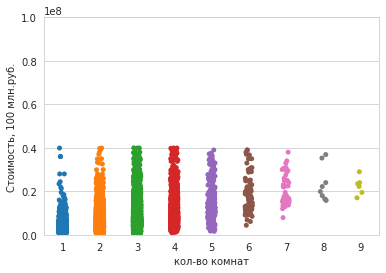

In [73]:
# Построим график зависимости цены квартиры от количества комнат
stripplot(data,'rooms', title='кол-во комнат')

**Вывод**:

 Значения на графике распределены равномерно.
 
 Количество комнат на цену не влияет.

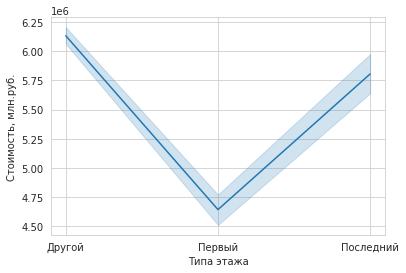

In [74]:
# Построим график зависимости цены квартиры от типа этажа

sns.lineplot(data = data, x = 'floor_type', y = 'last_price')
plt.xlabel('Tипа этажа')
plt.ylabel('Стоимость, млн.руб.')

plt.show()

**Вывод:**

Тип этажа влияет на цену объекта.
Объявления с квартирами на первом этаже стоят дешевле остальных.


In [75]:
def barplot(data, x, y, Xtitle, Ytitle):
    sns.barplot(data=data, x=x, y=y);
    plt.xlabel(f'{Xtitle}')
    plt.ylabel(f'{Ytitle} cтоимость; 10 млн.руб.')
    plt.ylim(0, 10000000)
    plt.show()

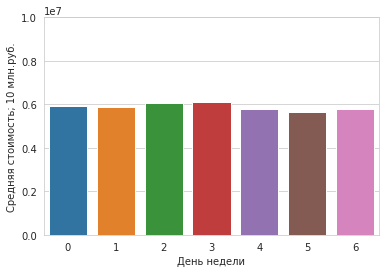

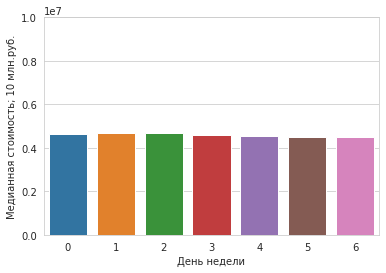

In [76]:
# график влияния дня недели на цену
days = data.pivot_table( index ='day_week', values = 'last_price', aggfunc =['mean','median'])
days.columns=['mean','median']
barplot(days, x=days.index, y='mean', Xtitle='День недели', Ytitle='Средняя');
barplot(days, x=days.index, y='median', Xtitle='День недели', Ytitle='Медианная');

В средней стоимости незначительно выделяется середина недели.
Цена не зависит от дня недели.

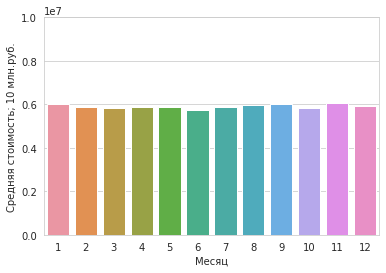

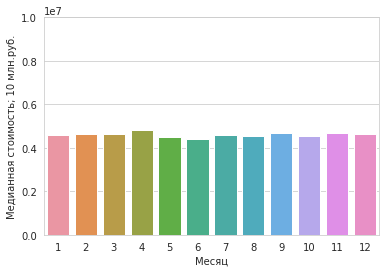

In [77]:
# график влияния месяца на цену
months = data.pivot_table( index ='month', values = 'last_price', aggfunc =['mean','median'])
months.columns=['mean','median']
barplot(months, x=months.index, y='mean', Xtitle='Месяц', Ytitle='Средняя');
barplot(months, x=months.index, y='median', Xtitle='Месяц', Ytitle='Медианная');

Значения у месяцов незначительно различаются.
Месяц размещения не влияет на цену.

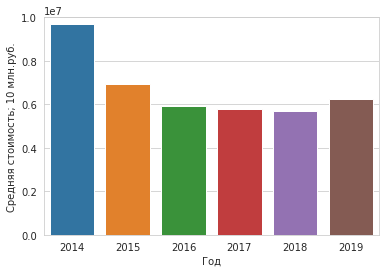

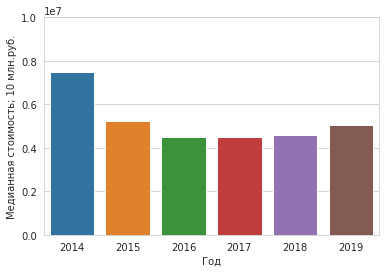

In [78]:
# график влияния года на цену
years = data.pivot_table( index ='year', values = 'last_price', aggfunc =['mean','median'])
years.columns=['mean','median']
barplot(years, x=years.index, y='mean', Xtitle='Год', Ytitle='Средняя');
barplot(years, x=years.index, y='median', Xtitle='Год', Ytitle='Медианная');

**Вывод:**
1. День недели и месяц ни как на цену ни влияли.
2. Самые высокие цены были в 2014 году. 
3. С 2014 по 2018 мы видим  постепенное снижение цены.
4. В 2019 году цены на квартиры выросли.

### Найти среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.


In [83]:
# 10 населённых пунктов с наибольшим числом объявлений.
mean_metr = data.pivot_table(index='locality_name', values = 'prise_metr', aggfunc =['count', 'mean','max', 'min'])
# переименуем столбцы
mean_metr.columns = ['count','mean', 'max_price_metr', 'min_price_metr']
# сохраним 10 населённых пунктах с наибольшим числом объявлений
mean_metr = mean_metr.sort_values(by='count',ascending=False).head(10)
mean_metr

,count,mean,max_price_metr,min_price_metr
locality_name,,,,
Санкт-Петербург,15450,111591.090362,848484.8,15345.3
поселок Мурино,552,85629.567754,138580.2,50000.0
поселок Шушары,439,78551.343964,147826.1,47700.4
Всеволожск,398,68654.475628,640422.4,31400.0
Пушкин,368,103100.889674,256521.7,59836.1
Колпино,338,75424.581953,125000.0,47957.4
поселок Парголово,327,90175.915291,138522.4,39206.0
Гатчина,307,68746.147231,146315.8,10507.2
деревня Кудрово,299,92473.546488,142857.1,54160.3


In [79]:
# округлим значение в стобце mean до 2 знаков после запятой
mean_metr['mean'] = mean_metr['mean'].round(decimals=2)
# Средняя цена за квадратный метр в населенном пункте
mean_metr

,count,mean,max_price_metr,min_price_metr
locality_name,,,,
Санкт-Петербург,15450,111591.09,848484.8,15345.3
поселок Мурино,552,85629.57,138580.2,50000.0
поселок Шушары,439,78551.34,147826.1,47700.4
Всеволожск,398,68654.48,640422.4,31400.0
Пушкин,368,103100.89,256521.7,59836.1
Колпино,338,75424.58,125000.0,47957.4
поселок Парголово,327,90175.92,138522.4,39206.0
Гатчина,307,68746.15,146315.8,10507.2
деревня Кудрово,299,92473.55,142857.1,54160.3


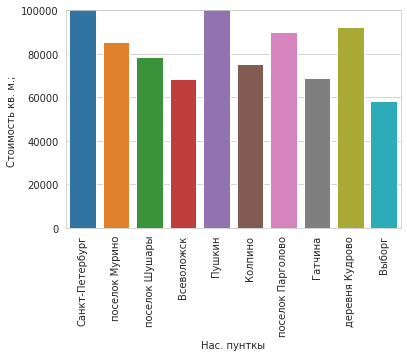

In [119]:
#Построим график со средней ценой

sns.barplot(data=mean_metr, x=mean_metr.index, y='mean');
plt.xlabel('Нас. пунткы')
plt.ylabel('Стоимость кв. м.; ')
plt.ylim(0, 100000)
plt.xticks(rotation = 90)
plt.show()


In [81]:
# Найдем населенный пункт с самой низкой ценой за кв. метр
mean_metr.sort_values(by='min_price_metr')

,count,mean,max_price_metr,min_price_metr
locality_name,,,,
Гатчина,307,68746.15,146315.8,10507.2
Санкт-Петербург,15450,111591.09,848484.8,15345.3
Выборг,237,58141.91,107473.1,18750.0
Всеволожск,398,68654.48,640422.4,31400.0
поселок Парголово,327,90175.92,138522.4,39206.0
поселок Шушары,439,78551.34,147826.1,47700.4
Колпино,338,75424.58,125000.0,47957.4
поселок Мурино,552,85629.57,138580.2,50000.0
деревня Кудрово,299,92473.55,142857.1,54160.3


**Вывод:**
Санкт-Петербург с показателем в 111 руб. за кв. метр скорее всего ошибка.
Если его не учитывать самая низкая цена за 1 кв. метр в Гатчине и Выборге и составляет менее 20 тыс. руб. за кв. метр.

In [82]:
# Найдем населенный пункт с самой высокой ценой за кв. метр
mean_metr.sort_values(by='max_price_metr', ascending=False)

,count,mean,max_price_metr,min_price_metr
locality_name,,,,
Санкт-Петербург,15450,111591.09,848484.8,15345.3
Всеволожск,398,68654.48,640422.4,31400.0
Пушкин,368,103100.89,256521.7,59836.1
поселок Шушары,439,78551.34,147826.1,47700.4
Гатчина,307,68746.15,146315.8,10507.2
деревня Кудрово,299,92473.55,142857.1,54160.3
поселок Мурино,552,85629.57,138580.2,50000.0
поселок Парголово,327,90175.92,138522.4,39206.0
Колпино,338,75424.58,125000.0,47957.4



Объект с самым дорогим кв. метром находится в Санкт-Петербурге с ценой более 1,9 млн. рублей за кв. метр.

### Узнаем как стоимость объектов зависит от расстояния до центра города.

In [83]:
# создадим сводную таблицу средней цены за километр
city=data.query('locality_name == "Санкт-Петербург"')
city_centers= city.pivot_table(index='city_centers_km', values = 'last_price', aggfunc='mean')
city_centers.head(10)

,last_price
city_centers_km,
0.0,1.659288e+07
1.0,1.241386e+07
2.0,1.163314e+07
3.0,1.001563e+07
4.0,1.083703e+07
5.0,1.145627e+07
6.0,1.087462e+07
7.0,1.066356e+07
8.0,9.004707e+06


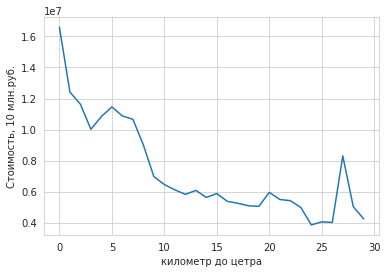

In [120]:
# график стоимости км.
sns.lineplot(data = city_centers, x = city_centers.index, y = 'last_price')
plt.xlabel('километр до цетра')
plt.ylabel('Стоимость, 10 млн.руб.')

plt.show()

**Вывод:**
Количество километров до центра прямо влияет на цену объекта. Чем дальше от центра, тем ниже цена.

## Общий вывод

Мы провели исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Проверили несколько гипотез и можем сделать следующие выводы:
1. **На цену объекта влияют**:
  - Площадь(общая, кухонная, жилая) квартиры. Чем больше площадь, тем выше цена объекта.
  - Этаж квартиры. Квартиры на первом этаже стоят дешевле остальных.
  - Удаленность от центра.  Чем Ближе к центру, тем выше стоимость квартир.
  - Так же влияет год продажи объявления.(Самые высокие цены в 2014 году и постепенное снижение цены до 2018, в 2019 цены вновь выросли)
2. **На цену объекта не влияет**:
  - Количество комнат.
  
  
Так же мы выяснили, что квартира с самой высокой ценой за кв. метр находится в Санкт-Петербурге.
А самая низкая цена за кв. метр в Гатчине.

Средняя длительность продажи квартиры составляет 181 день. Самые быстрые продажи составляют до 45 дней.
Самые долгие более 500 дней.
